In [7]:
from datetime import datetime
from config import *
import os
import pandas as pd
from glob import glob
import utils.tradingview as tv
import utils.plotting as pt
from clustimage import Clustimage
import shutil

In [2]:
df500 = pd.read_csv(nifty500_csv)
nifty500_list = df500['Symbol']

In [9]:
fno = """APOLLOTYRE
HINDPETRO
DELTACORP
IBULHSGFIN
BPCL
MFSL
IDFC
IOC
IGL
RELIANCE
BHEL
BSOFT
OFSS
L&TFH
RECLTD
HEROMOTOCO
INTELLECT
BANDHANBNK
CHAMBLFERT
PERSISTENT
SRF
OBEROIRLTY
FSL
GUJGASLTD
ASIANPAINT
MGL
IDFCFIRSTB
LTI
TVSMOTOR
INDIAMART
BALKRISIND
ATUL
PETRONET
TATACOMM
VOLTAS
WIPRO
GLENMARK
BERGEPAINT
BAJAJ-AUTO
MRF
INDIGO
HAL
DEEPAKNTR
PIIND
INDHOTEL
RAIN
BAJAJFINSV
MANAPPURAM
IRCTC
AARTIIND
SBILIFE
TATACONSUM
ABFRL
ABCAPITAL
PEL
DIVISLAB
ICICIPRULI
TATACHEM
BAJFINANCE
ASHOKLEY
LICHSGFIN
AXISBANK
MPHASIS
LUPIN
TECHM
ICICIBANK
BEL
AUBANK
GRANULES
RBLBANK
WHIRLPOOL
PIDILITIND
SBICARD
BHARATFORG
TATAMOTORS
ZEEL
JKCEMENT
PFC
INFY
AUROPHARMA
NAVINFLUOR
BALRAMCHIN
M&MFIN
CANFINHOME
IDEA
TCS
GNFC
COFORGE
BATAINDIA
ADANIPORTS
INDUSTOWER
NESTLEIND
NAUKRI
UBL
DABUR
FEDERALBNK
KOTAKBANK
MARUTI
MCX
MCDOWELL-N
CUB
CUMMINSIND
ADANIENT
GODREJPROP
NIFTY
CONCOR
GMRINFRA
HDFCLIFE
PAGEIND
EICHERMOT
ABB
LTTS
UPL
COLPAL
NTPC
ASTRAL
MUTHOOTFIN
TATAPOWER
SHREECEM
TITAN
HCLTECH
SUNTV
EXIDEIND
ONGC
INDUSINDBK
BIOCON
BOSCHLTD
LALPATHLAB
ULTRACEMCO
POWERGRID
POLYCAB
ITC
BANKNIFTY
TRENT
AMBUJACEM
SRTRANSFIN
CROMPTON
MOTHERSON
CHOLAFIN
RAMCOCEM
ACC
PVR
HDFCAMC
SUNPHARMA
TORNTPHARM
DALBHARAT
GAIL
BRITANNIA
METROPOLIS
ICICIGI
MARICO
LT
DLF
SIEMENS
BHARTIARTL
JUBLFOOD
ESCORTS
GRASIM
COROMANDEL
IPCALAB
BANKBARODA
SBIN
ZYDUSLIFE
HAVELLS
HINDUNILVR
DRREDDY
GODREJCP
INDIACEM
PNB
CANBK
ABBOTINDIA
DIXON
LAURUSLABS
HINDCOPPER
CIPLA
AMARAJABAT
M&M
ALKEM
SYNGENE
NATIONALUM
HDFC
HDFCBANK
APOLLOHOSP
NMDC
COALINDIA
TORNTPOWER
TATASTEEL
SAIL
VEDL
IEX
HINDALCO
HONAUT
JSWSTEEL
JINDALSTEL
GSPL"""

In [10]:
fno = fno.split('\n')

In [11]:
os.chdir(vwap_img)

In [12]:
files = glob(str(minute_5) + "/*filt*")

In [13]:
len(files)

499

In [ ]:
inst

In [ ]:
l = []
files = glob('*')
for f in files:
    if 'png' in f:
        # print(f)
        # break
        change = float(f.split('_')[-1].replace('.png',''))
        if change >= 3.0:
            # print(change)
            shutil.move(f, str(vwap_img) + "/plus_3p/" +f)

In [ ]:
img_files = glob('*')
for i in img_files:
    print(i.split('_')[0])
    display(Image(filename=i))
    setup = -1
    while setup not in range(1,7):
        setup = int(input('Setup: '))
    path2 = str(vwap_img) + "/setup_{}/".format(setup) +i
    shutil.move(i, path2)
    clear_output(wait=True)

In [16]:
for f in files:
    print(f)
    symbol = f.split('/')[-1].split('_')[0]
    print(symbol)
    if symbol not in fno:
        print('Skipping', f)
        continue
    # try:
    df = pd.read_csv(f)
    # df['DateTime'] = df['date'].apply(lambda x: datetime.strptime(x.split('+')[0], '%Y-%m-%d %H:%M:%S'))
    # df['Date'] = df['date'].apply(lambda x: datetime.strptime(x.split(' ')[0], '%Y-%m-%d'))
    # if 'vwap' not in df.columns:
    #     df = df.groupby(df.Date, group_keys=False).apply(vwap)
    # if 'tp' not in df.columns:
    #     df['tp'] = (df['high']+df['low']+ df['close'])/3
    # if 'tp_vwap' not in df.columns:
    #     df = df.groupby(df.Date, group_keys=False).apply(typical_vwap)
    # if 'vwap_close' not in df.columns:
    #     df['vwap_close'] = df['vwap'] - df['close']
    # if 'vwap_tp' not in df.columns:
    #     df['vwap_typical'] = df['vwap'] - df['tp']

    for name, group in df.groupby(['Date']):
        # print(group.shape[0])
        # if not check_vols(group) or group.shape[0] < 75:
        #     idx = df[df['Date'] == name].index
        #     df.drop(idx, inplace=True)
        # else:
        c = group['close'].iloc[-1]
        o = group['open'].iloc[0]
        h = max(group['high'])
        c0 = group['close'].iloc[0]
        change_ = round((c/o - 1) * 100,2)
        peak_change = round((h/o - 1) * 100,2)
        od = round((c0/o - 1) * 100,2)

        imgname = f.split('/')[-1].split('_')[0] + '_' +str(name).split(' ')[0].replace('-','') + '_' + str(change_)
        # os.chdir(vwap_img)
        # print(od, peak_change)
        if imgname not in glob('*.png') and change_ > 5.0:
            pt.save_plot(group, imgname)
    # for i in df.columns:
    #     if 'Unnamed' in i:
    #         df.drop(i, inplace = True, axis=1)
    # os.chdir(minute_5)
    # df.to_csv(f + '_filtered.csv')
    print(f)
    # break
    # except:
    #         print('Error in Symbol', f)

/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/PGHL_20220101_20221231_filtered.csv
PGHL
Skipping /Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/PGHL_20220101_20221231_filtered.csv
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/OBEROIRLTY_20220101_20221231_filtered.csv
OBEROIRLTY
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/OBEROIRLTY_20220101_20221231_filtered.csv
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/TRENT_20220101_20221231_filtered.csv
TRENT
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/TRENT_20220101_20221231_filtered.csv
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/IDFC_20220101_20221231_filtered.csv
IDFC
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/IDFC_20220101_20221231_filtered.csv
/Users/yash/Desktop/Trading/historical_data/kite_connect/minute_5/ATUL_20220101_20221231_filtered.csv
ATUL
/Users/yash/Desktop/Trading

CLUSTERING

In [17]:

# init with PCA method
cl = Clustimage(grayscale=True)
# cl = Clustimage(method='hog', params_hog={'orientations':8, 'pixels_per_cell':(8,8)})

In [18]:
results = cl.fit_transform(str(vwap_img), max_clust=50, cluster = 'kmeans')

[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Extracting images from: [/Users/yash/Desktop/Trading/VWAP/img]
[clustimage] >INFO> [517] files are collected recursively from path: [/Users/yash/Desktop/Trading/VWAP/img]
[clustimage] >INFO> [517] images are extracted.
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
100%|██████████| 517/517 [00:02<00:00, 175.05it/s]
[clustimage] >INFO> Extracting features using method: [pca]


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [16384] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [434] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [16384] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


[clustimage] >INFO> Extracted features using [pca]: samples=517, features=434
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.



[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 47/47 [00:11<00:00,  4.06it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (517, 434) feature-space.


[clusteval] >Optimal number clusters detected: [3].
[clusteval] >Fin.


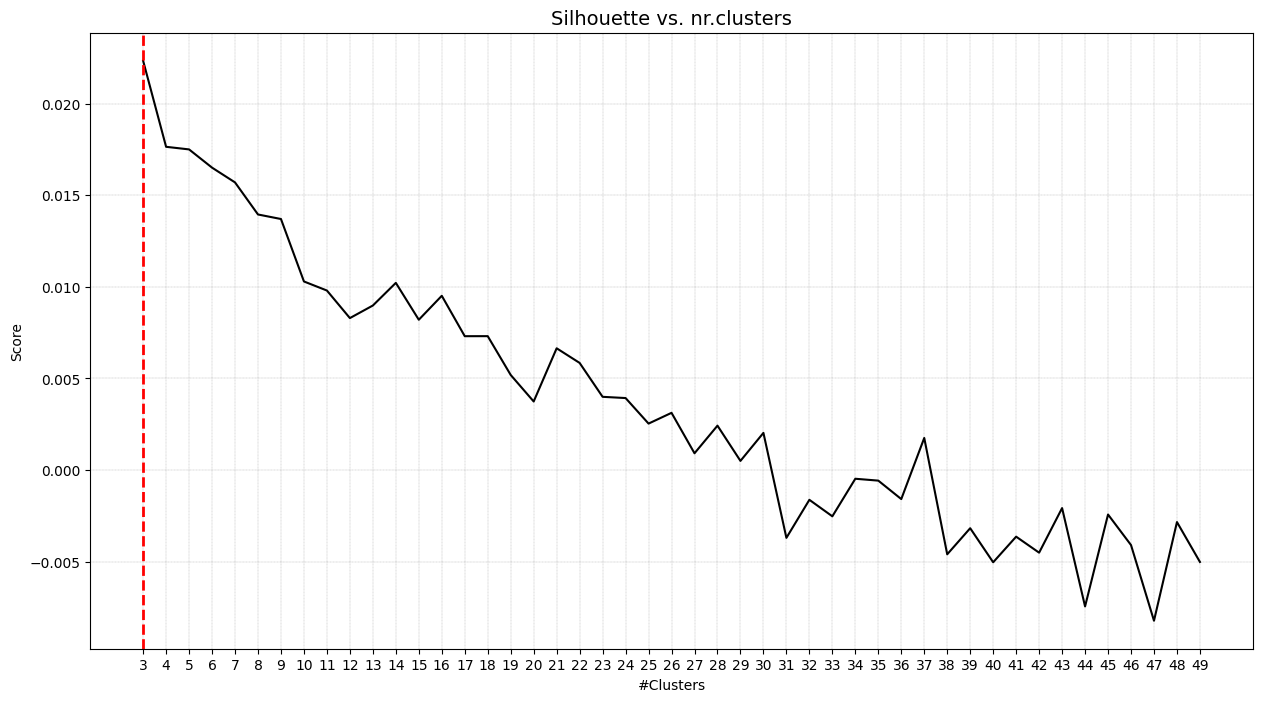

[clusteval] >Estimated number of n_clusters: 2, average silhouette_score=0.369


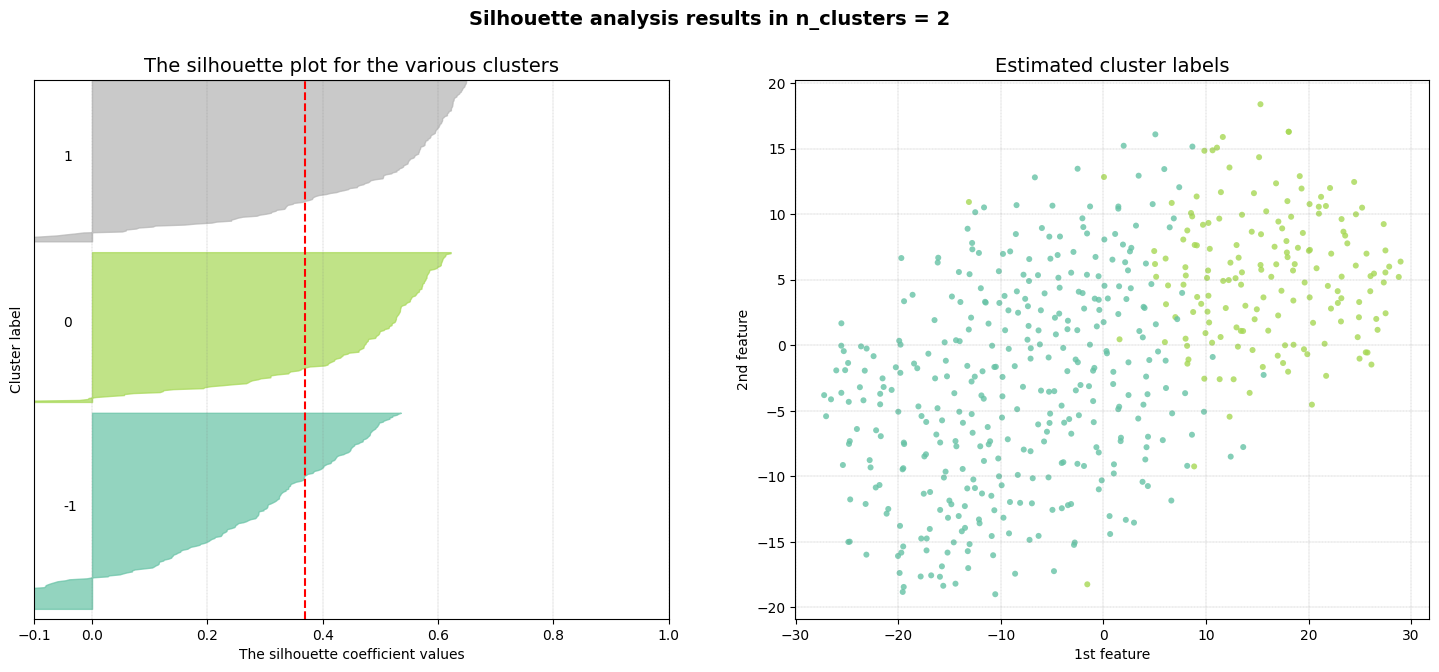

(<Figure size 1800x700 with 2 Axes>,
 <AxesSubplot: title={'center': 'The silhouette plot for the various clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <AxesSubplot: title={'center': 'Estimated cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [19]:
# Cluster evaluation plots such as the Silhouette plot
cl.clusteval.plot()
cl.clusteval.scatter(cl.results['xycoord'])

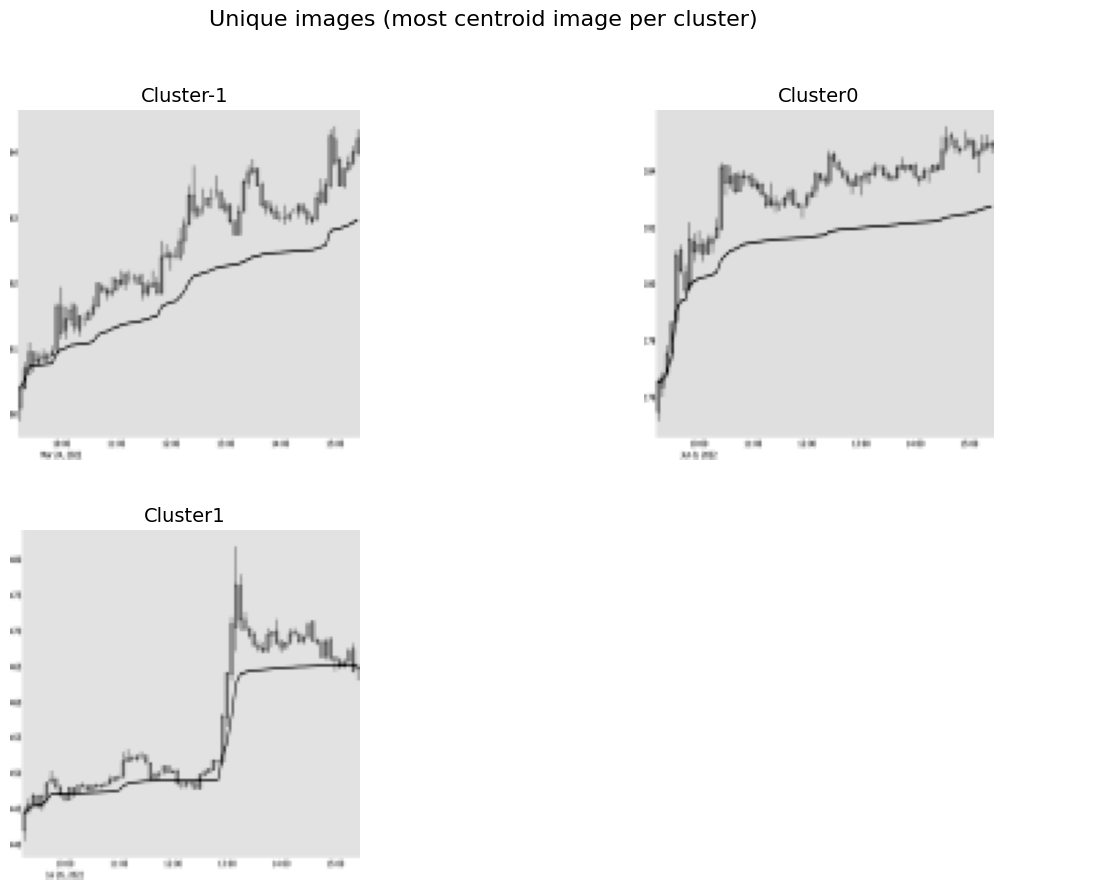

In [20]:
cl.plot_unique(img_mean=False)

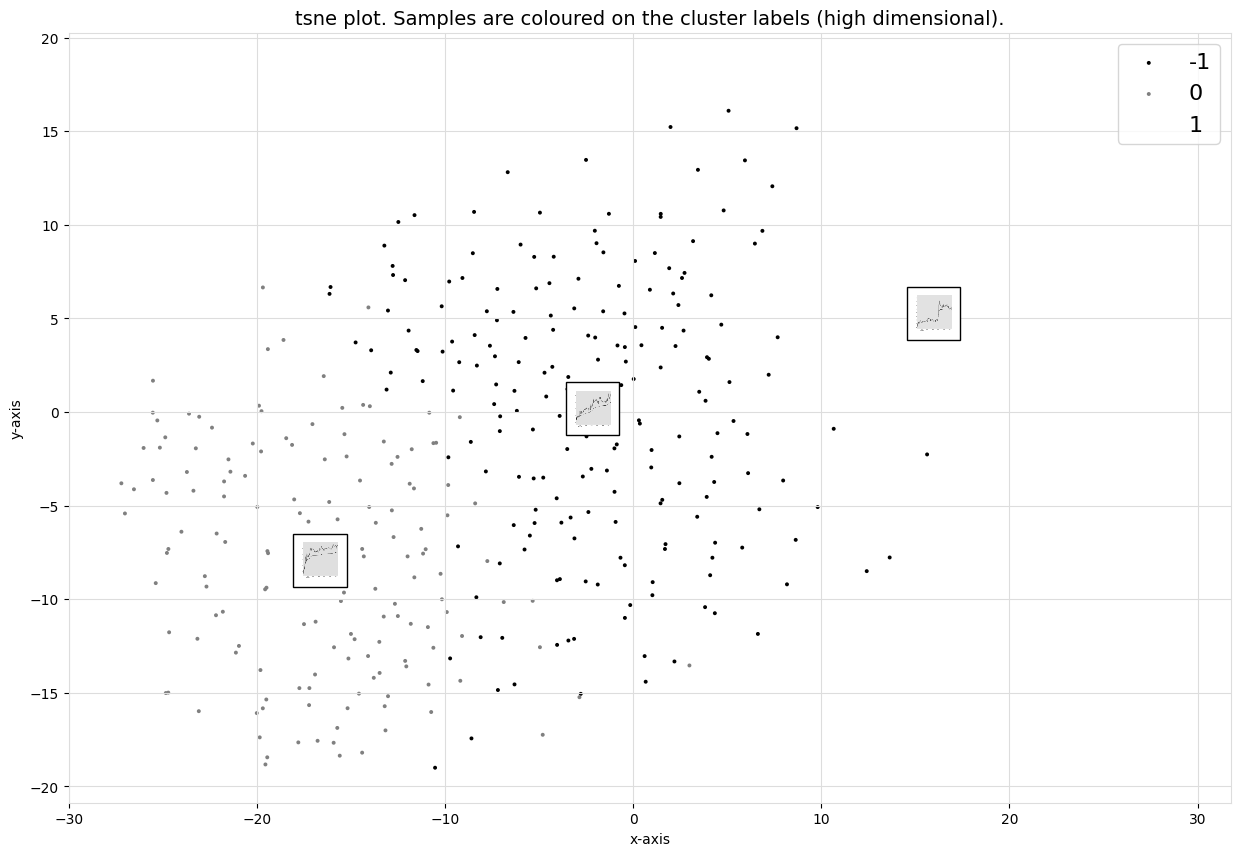

(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 640x480 with 0 Axes>

In [21]:
cl.scatter(dotsize=8, zoom=0.2, img_mean=False)